# IMPORTAR LIBRERIAS


In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import utils as ut

In [29]:
import warnings
warnings.filterwarnings("ignore")

# DATA SETS LECTURA

In [30]:
df_train = pd.read_csv('./data/train.csv', index_col='id')

df_test = pd.read_csv('./data/test.csv', index_col='id')

df_sample_submission = pd.read_csv('./data/sample_submission.csv', index_col='id')

In [31]:
df_train_limpio = ut.pasar_a_limpito_ds(df_train)

<class 'pandas.core.frame.DataFrame'>


# EDA

In [32]:
# ESTO SOLO CON EL TRAIN CUIDADO

columna_a_mover= "Price_euros"

df_train_limpio = df_train_limpio[[col for col in df_train_limpio.columns if col != columna_a_mover] + [columna_a_mover]]

In [33]:
df_train_limpio.head()

,laptop_ID,Inches,Ram,Weight,Resolution,IPS_Panel,Touchscreen,COMPANY,Intel,AMD,PROCESADOR,Type_Name,OP_SYS,MEMORY,GPU,Price_euros
id,,,,,,,,,,,,,,,,
0,972,13.3,8,1.30,5760000.0,0,0,3,1,0,5,4,5,2,1,1268.00
1,1085,15.6,4,2.06,1049088.0,0,0,3,1,0,3,3,5,1,1,481.98
2,1013,14.0,8,1.48,2073600.0,0,0,3,1,0,5,4,5,3,1,2089.00
3,891,13.3,4,1.28,2073600.0,0,1,3,1,0,4,3,5,2,1,1700.00
4,1284,15.6,6,2.04,2073600.0,0,0,3,0,1,2,3,5,1,1,549.99


In [34]:
df_train_limpio = df_train_limpio.drop('laptop_ID', axis=1)

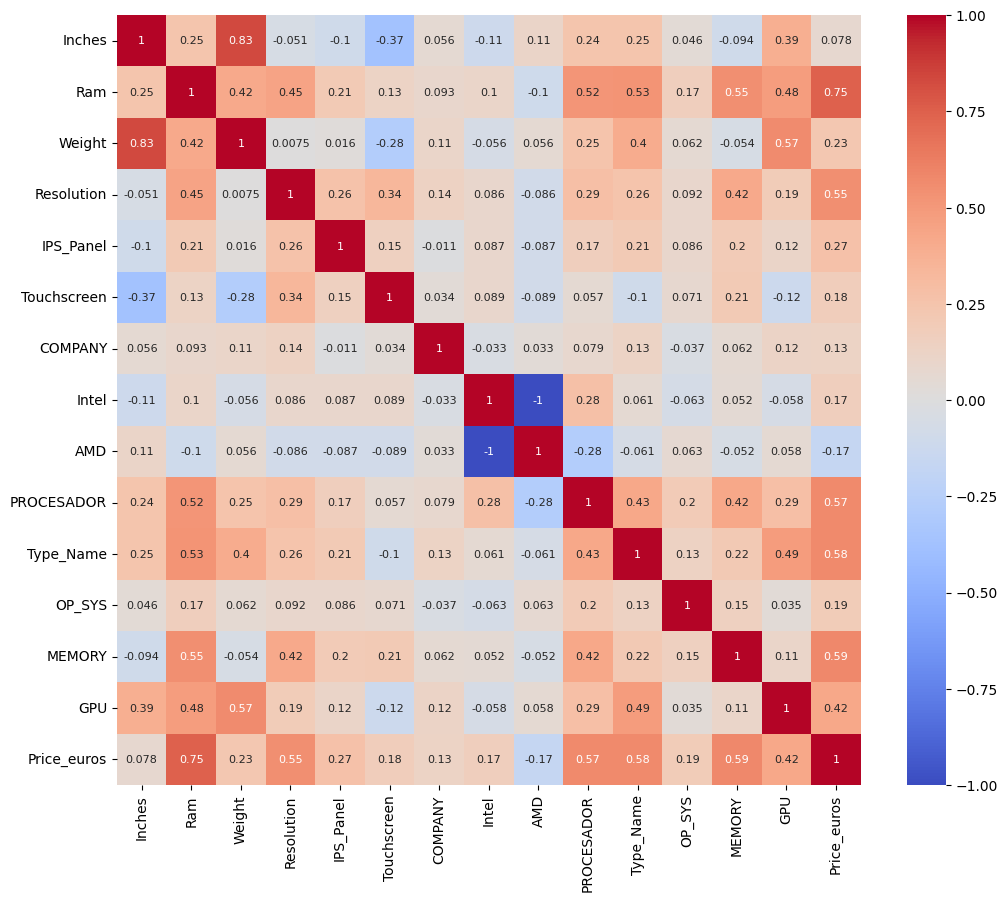

In [35]:
correlation_train_limpio = ut.crear_mapa_de_correlacion(df_train_limpio)

# MODELADO

In [36]:
X =df_train_limpio.drop(columns=["Price_euros"])
y = df_train_limpio["Price_euros"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=10)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(729, 14)
(183, 14)
(729,)
(183,)


In [39]:
df_train_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Inches       912 non-null    float64
 1   Ram          912 non-null    int64  
 2   Weight       912 non-null    float64
 3   Resolution   912 non-null    float64
 4   IPS_Panel    912 non-null    int64  
 5   Touchscreen  912 non-null    int64  
 6   COMPANY      912 non-null    int64  
 7   Intel        912 non-null    int64  
 8   AMD          912 non-null    int64  
 9   PROCESADOR   912 non-null    int64  
 10  Type_Name    912 non-null    int64  
 11  OP_SYS       912 non-null    int64  
 12  MEMORY       912 non-null    int64  
 13  GPU          912 non-null    int64  
 14  Price_euros  912 non-null    float64
dtypes: float64(4), int64(11)
memory usage: 114.0 KB


In [40]:
# X_train = X_train.dropna()
# y_train = y_train[X_train.index]  # Asegúrate de que `y_train` tenga el mismo índice que `X_train`

In [ ]:
# Contar valores NaN por columna
nan_counts = df_train_limpio.isna().sum()
print(nan_counts[nan_counts > 0])  # Mostrar solo columnas con NaN


# RELLENAR CON LA MEDIA 

Series([], dtype: int64)


In [ ]:
# NO SE POR QUE ME DA ESTE ERROR PERO NO ME VOY A COMER LA CABEZA

from sklearn.impute import SimpleImputer

# Crear un imputador que rellena valores faltantes con la media
imputer = SimpleImputer(strategy="mean")

# Ajustar el imputador y transformar `X_train`
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  

In [43]:
ln = LinearRegression()
ln.fit(X_train, y_train)

pred = ln.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))

MAE:  260.7159110945891
MSE:  146430.75377299462


## POLINOMICA


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df_train_limpio.drop(columns=["Price_euros"])
y = df_train_limpio["Price_euros"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Crear y aplicar la transformación polinómica
poly = PolynomialFeatures(degree=2)  # Prueba diferentes grados como 1, 2, y 3
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Escalado de los datos
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Búsqueda de hiperparámetros detallada para ElasticNet
param_grid_elastic = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Rango más amplio
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

elastic_net = ElasticNet(random_state=10, max_iter=10000, tol=1e-4)  # Ajuste de max_iter y tol
grid_search_elastic = GridSearchCV(estimator=elastic_net, param_grid=param_grid_elastic, scoring='r2', cv=10)
grid_search_elastic.fit(X_train_poly_scaled, y_train)

# Evaluar modelos de regularización adicionales (Ridge y Lasso)
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = Ridge(random_state=10, max_iter=10000)
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring='r2', cv=10)
grid_search_ridge.fit(X_train_poly_scaled, y_train)

param_grid_lasso = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
lasso = Lasso(random_state=10, max_iter=10000)
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, scoring='r2', cv=10)
grid_search_lasso.fit(X_train_poly_scaled, y_train)

# Resultados del mejor modelo ElasticNet
best_elastic_model = grid_search_elastic.best_estimator_

# Evaluación usando validación cruzada
cv_scores = cross_val_score(best_elastic_model, X_train_poly_scaled, y_train, scoring='r2', cv=10)
print("Promedio de R2 en validación cruzada:", np.mean(cv_scores))

# Predicciones y evaluación
print("\nEvaluación en el conjunto de entrenamiento:")
y_pred_train = best_elastic_model.predict(X_train_poly_scaled)
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("R2:", r2_score(y_train, y_pred_train))

print("\nEvaluación en el conjunto de prueba:")
y_pred_test = best_elastic_model.predict(X_test_poly_scaled)
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("R2:", r2_score(y_test, y_pred_test))

# Imprimir los mejores parámetros encontrados
print("\nMejores parámetros ElasticNet encontrados:")
print(grid_search_elastic.best_params_)

# Evaluación de Ridge y Lasso
print("\nMejores parámetros Ridge encontrados:")
print(grid_search_ridge.best_params_)

print("\nMejores parámetros Lasso encontrados:")
print(grid_search_lasso.best_params_)


Promedio de R2 en validación cruzada: 0.7528043834350909

Evaluación en el conjunto de entrenamiento:
MAE: 207.6237967894681
MSE: 83628.14019537077
R2: 0.8372670800310791

Evaluación en el conjunto de prueba:
MAE: 234.4641283982436
MSE: 115832.15681064723
R2: 0.7658977359501041

Mejores parámetros ElasticNet encontrados:
{'alpha': 1.0, 'l1_ratio': 1.0}

Mejores parámetros Ridge encontrados:
{'alpha': 10.0}

Mejores parámetros Lasso encontrados:
{'alpha': 1.0}


In [ ]:
import utils as ut

df_test_limpio = ut.pasar_a_limpito_ds(df_test)

<class 'pandas.core.frame.DataFrame'>


In [46]:
df_test_limpio


,laptop_ID,Inches,Ram,Weight,Resolution,IPS_Panel,Touchscreen,COMPANY,Intel,AMD,PROCESADOR,Type_Name,OP_SYS,MEMORY,GPU
id,,,,,,,,,,,,,,,
6,590,15.6,16,1.93,2073600.0,0,0,3,1,0,5,3,5,2,1
8,393,15.6,8,2.23,2073600.0,0,0,3,1,0,4,5,5,1,3
14,1081,17.3,64,3.58,2073600.0,1,0,3,1,0,5,5,5,3,3
21,606,15.6,8,2.06,2073600.0,0,1,3,1,0,5,5,5,2,1
22,522,11.6,2,1.10,1049088.0,0,0,3,1,0,1,2,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,145,15.6,8,2.40,2073600.0,1,0,3,1,0,5,5,1,2,2
1285,1088,13.3,8,1.49,2073600.0,0,0,3,1,0,5,3,5,2,1
1286,1148,15.6,8,1.84,2073600.0,0,0,3,1,0,5,4,5,2,1


In [47]:
df_test_limpio = df_test_limpio.drop('laptop_ID', axis=1)

In [48]:
type(df_test_limpio)

pandas.core.frame.DataFrame

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df_train_limpio.drop(columns=["Price_euros"])
y = df_train_limpio["Price_euros"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Crear y aplicar la transformación polinómica
poly = PolynomialFeatures(degree=2)  # Prueba diferentes grados como 1, 2, y 3
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Escalado de los datos
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Búsqueda de hiperparámetros detallada para ElasticNet
param_grid_elastic = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Rango más amplio
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

elastic_net = ElasticNet(random_state=10, max_iter=10000, tol=1e-4)  # Ajuste de max_iter y tol
grid_search_elastic = GridSearchCV(estimator=elastic_net, param_grid=param_grid_elastic, scoring='r2', cv=10)
grid_search_elastic.fit(X_train_poly_scaled, y_train)

# Evaluar modelos de regularización adicionales (Ridge y Lasso)
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = Ridge(random_state=10, max_iter=10000)
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring='r2', cv=10)
grid_search_ridge.fit(X_train_poly_scaled, y_train)

param_grid_lasso = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
lasso = Lasso(random_state=10, max_iter=10000)
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, scoring='r2', cv=10)
grid_search_lasso.fit(X_train_poly_scaled, y_train)

# Resultados del mejor modelo ElasticNet
best_elastic_model = grid_search_elastic.best_estimator_

# Evaluación usando validación cruzada
cv_scores = cross_val_score(best_elastic_model, X_train_poly_scaled, y_train, scoring='r2', cv=10)
print("Promedio de R2 en validación cruzada:", np.mean(cv_scores))

# Predicciones y evaluación
print("\nEvaluación en el conjunto de entrenamiento:")
y_pred_train = best_elastic_model.predict(X_train_poly_scaled)
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("R2:", r2_score(y_train, y_pred_train))

print("\nEvaluación en el conjunto de prueba:")
y_pred_test = best_elastic_model.predict(X_test_poly_scaled)
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("R2:", r2_score(y_test, y_pred_test))

# Imprimir los mejores parámetros encontrados
print("\nMejores parámetros ElasticNet encontrados:")
print(grid_search_elastic.best_params_)

# Evaluación de Ridge y Lasso
print("\nMejores parámetros Ridge encontrados:")
print(grid_search_ridge.best_params_)

print("\nMejores parámetros Lasso encontrados:")
print(grid_search_lasso.best_params_)


Promedio de R2 en validación cruzada: 0.7528043834350909

Evaluación en el conjunto de entrenamiento:
MAE: 207.6237967894681
MSE: 83628.14019537077
R2: 0.8372670800310791

Evaluación en el conjunto de prueba:
MAE: 234.4641283982436
MSE: 115832.15681064723
R2: 0.7658977359501041

Mejores parámetros ElasticNet encontrados:
{'alpha': 1.0, 'l1_ratio': 1.0}

Mejores parámetros Ridge encontrados:
{'alpha': 10.0}

Mejores parámetros Lasso encontrados:
{'alpha': 1.0}


In [54]:
df_test_limpio = df_test_limpio.drop(columns=['Price_euros'], errors='ignore')

df_test_limpio_poly = poly.transform(df_test_limpio)
df_test_limpio_poly_scaled = scaler.transform(df_test_limpio_poly)

predicciones_precio = best_elastic_model.predict(df_test_limpio_poly_scaled)

df_test_limpio['Price_euros'] = predicciones_precio

df_entrega = df_test_limpio[['Price_euros']].reset_index()

In [55]:
df_entrega

,id,Price_euros
0,6,1352.263000
1,8,1624.732049
2,14,4765.154663
3,21,1828.592453
4,22,358.725308
...,...,...
386,1281,1724.619383
387,1285,1205.426015
388,1286,1432.382315
389,1295,883.400548


In [56]:
df_entrega.to_csv('ds_Test_con_predicciones_4.csv', index=False)